In [22]:
import sqlite3

cnx = sqlite3.connect("test.db")
cursor = cnx.cursor()


# 262. Trips and Users
<div><p>Table: <code>Trips</code></p>

<pre>+-------------+----------+
| Column Name | Type     |
+-------------+----------+
| id          | int      |
| client_id   | int      |
| driver_id   | int      |
| city_id     | int      |
| status      | enum     |
| request_at  | date     |     
+-------------+----------+
id is the primary key for this table.
The table holds all taxi trips. Each trip has a unique id, while client_id and driver_id are foreign keys to the users_id at the Users table.
Status is an ENUM type of ('completed', 'cancelled_by_driver', 'cancelled_by_client').
</pre>

<p>&nbsp;</p>

<p>Table: <code>Users</code></p>

<pre>+-------------+----------+
| Column Name | Type     |
+-------------+----------+
| users_id    | int      |
| banned      | enum     |
| role        | enum     |
+-------------+----------+
users_id is the primary key for this table.
The table holds all users. Each user has a unique users_id, and role is an ENUM type of ('client', 'driver', 'partner').
banned is an ENUM type of ('Yes', 'No').
</pre>

<p>&nbsp;</p>

<p>The <strong>cancellation rate</strong> is computed by dividing the number of canceled (by client or driver) requests with unbanned users by the total number of requests with unbanned users on that day.</p>

<p>Write a SQL query to find the <strong>cancellation rate</strong> of requests with unbanned users (<strong>both client and driver must not be banned</strong>) each day between <code>"2013-10-01"</code> and <code>"2013-10-03"</code>. Round <code>Cancellation Rate</code> to <strong>two decimal</strong> points.</p>

<p>Return the result table in <strong>any order</strong>.</p>

<p>The query result format is in the following example.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> 
Trips table:
+----+-----------+-----------+---------+---------------------+------------+
| id | client_id | driver_id | city_id | status              | request_at |
+----+-----------+-----------+---------+---------------------+------------+
| 1  | 1         | 10        | 1       | completed           | 2013-10-01 |
| 2  | 2         | 11        | 1       | cancelled_by_driver | 2013-10-01 |
| 3  | 3         | 12        | 6       | completed           | 2013-10-01 |
| 4  | 4         | 13        | 6       | cancelled_by_client | 2013-10-01 |
| 5  | 1         | 10        | 1       | completed           | 2013-10-02 |
| 6  | 2         | 11        | 6       | completed           | 2013-10-02 |
| 7  | 3         | 12        | 6       | completed           | 2013-10-02 |
| 8  | 2         | 12        | 12      | completed           | 2013-10-03 |
| 9  | 3         | 10        | 12      | completed           | 2013-10-03 |
| 10 | 4         | 13        | 12      | cancelled_by_driver | 2013-10-03 |
+----+-----------+-----------+---------+---------------------+------------+
Users table:
+----------+--------+--------+
| users_id | banned | role   |
+----------+--------+--------+
| 1        | No     | client |
| 2        | Yes    | client |
| 3        | No     | client |
| 4        | No     | client |
| 10       | No     | driver |
| 11       | No     | driver |
| 12       | No     | driver |
| 13       | No     | driver |
+----------+--------+--------+
<strong>Output:</strong> 
+------------+-------------------+
| Day        | Cancellation Rate |
+------------+-------------------+
| 2013-10-01 | 0.33              |
| 2013-10-02 | 0.00              |
| 2013-10-03 | 0.50              |
+------------+-------------------+
<strong>Explanation:</strong> 
On 2013-10-01:
  - There were 4 requests in total, 2 of which were canceled.
  - However, the request with Id=2 was made by a banned client (User_Id=2), so it is ignored in the calculation.
  - Hence there are 3 unbanned requests in total, 1 of which was canceled.
  - The Cancellation Rate is (1 / 3) = 0.33
On 2013-10-02:
  - There were 3 requests in total, 0 of which were canceled.
  - The request with Id=6 was made by a banned client, so it is ignored.
  - Hence there are 2 unbanned requests in total, 0 of which were canceled.
  - The Cancellation Rate is (0 / 2) = 0.00
On 2013-10-03:
  - There were 3 requests in total, 1 of which was canceled.
  - The request with Id=8 was made by a banned client, so it is ignored.
  - Hence there are 2 unbanned request in total, 1 of which were canceled.
  - The Cancellation Rate is (1 / 2) = 0.50
</pre>
</div>

In [2]:
query = '''SELECT Request_at as Day, round(sum(IIF(Status != 'completed', 1.0, 0))/count(*),2) 'Cancellation rate'
FROM Trips WHERE date(Request_at) BETWEEN '2013-10-01' AND '2013-10-03' 
AND Client_Id IN (SELECT Users_Id FROM USERS WHERE Banned='No') 
AND Driver_Id IN (SELECT Users_Id FROM USERS WHERE Banned='No') 
group by Request_at'''

cursor.execute(query)
for row in cursor:
    print(row) 

('2013-10-01', 0.33)
('2013-10-02', 0.0)
('2013-10-03', 0.5)



# 511. Game play analysis I 
<p>Write an SQL query statement to get the date when each player first landed on the platform.</p> 
<p>The format of query results is as follows:</p> 
<blockquote class="code-block"><pre>Activity Table:
+-----------+-----------+------------+--------------+
| player_id | device_id | event_date | games_played |
+-----------+-----------+------------+--------------+
| 1         | 2         | 2016-03-01 | 5            |
| 1         | 2         | 2016-05-02 | 6            |
| 2         | 3         | 2017-06-25 | 1            |
| 3         | 1         | 2016-03-02 | 0            |
| 3         | 4         | 2018-07-03 | 5            |
+-----------+-----------+------------+--------------+

Result Table:
+-----------+-------------+
| player_id | first_login |
+-----------+-------------+
| 1         | 2016-03-01  |
| 2         | 2017-06-25  |
| 3         | 2016-03-02  |
+-----------+-------------+




In [4]:
query = "SELECT player_id, MIN(date(event_date)) as 'first_login' FROM Activity GROUP BY player_id"
cursor.execute(query)  
for row in cursor:
    print(row) 

(1, '2016-03-01')
(2, '2017-06-25')
(3, '2016-03-02')


# 512. Game play analysis II 
<p>Please write an SQL query to describe the device name of each player's first login</p> 
<p>The query result format is in the following example:</p> 
<blockquote class="code-block"><pre>Activity table:
+-----------+-----------+------------+--------------+
| player_id | device_id | event_date | games_played |
+-----------+-----------+------------+--------------+
| 1         | 2         | 2016-03-01 | 5            |
| 1         | 2         | 2016-05-02 | 6            |
| 2         | 3         | 2017-06-25 | 1            |
| 3         | 1         | 2016-03-02 | 0            |
| 3         | 4         | 2018-07-03 | 5            |
+-----------+-----------+------------+--------------+

Result table:
+-----------+-----------+
| player_id | device_id |
+-----------+-----------+
| 1         | 2         |
| 2         | 3         |
| 3         | 1         |
+-----------+-----------+


In [5]:
query = '''SELECT player_id, device_id FROM 
(SELECT *, row_number() over (PARTITION by player_id ORDER bY event_date) as r FROM Activity)
WHERE r=1'''
cursor.execute(query)
for row in cursor:
    print(row) 

(1, 2)
(2, 3)
(3, 1)



# 534. Game play Analysis III
<p>Write an SQL query and report each group of players and dates, as well as how many games players have played so far. That is, the total number of games played by players before this date. Please see the example for details.</p> 
<p>The query result format is as follows:</p> 
<blockquote class="code-block"><pre>Activity table:
+-----------+-----------+------------+--------------+
| player_id | device_id | event_date | games_played |
+-----------+-----------+------------+--------------+
| 1         | 2         | 2016-03-01 | 5            |
| 1         | 2         | 2016-05-02 | 6            |
| 1         | 3         | 2017-06-25 | 1            |
| 3         | 1         | 2016-03-02 | 0            |
| 3         | 4         | 2018-07-03 | 5            |
+-----------+-----------+------------+--------------+

Result table:
+-----------+------------+---------------------+
| player_id | event_date | games_played_so_far |
+-----------+------------+---------------------+
| 1         | 2016-03-01 | 5                   |
| 1         | 2016-05-02 | 11                  |
| 1         | 2017-06-25 | 12                  |
| 3         | 2016-03-02 | 0                   |
| 3         | 2018-07-03 | 5                   |
+-----------+------------+---------------------+
about ID Players of 1, 2016-05-02 We played for five years+6=11 Games, 2017-06-25 We played for five years+6+1=12 A game.
about ID Players for 3, 2018-07-03 Played 0 in total+5=5 A game.
Please note that for each player, we only care about the player's login date.
</pre></blockquote> 


In [11]:
query = '''SELECT player_id,event_date, 
sum(games_played) over (PARTITION BY player_id ORDER BY event_date ) as games_played_so_far 
FROM Activity5 '''

cursor.execute(query)
for row in cursor:
    print(row) 

(1, '2016-03-01', 5)
(1, '2016-05-02', 11)
(1, '2017-06-25', 12)
(3, '2016-03-02', 0)
(3, '2018-07-03', 5)



# 550. Game play analysis IV
<p>Write an SQL query to report the rate of players who log in again the day after the first login, rounded to two decimal places. In other words, you need to calculate the number of players who have logged in for at least two consecutive days from the first login date, and then divide it by the total number of players.</p> 
<p>The query result format is as follows:</p> 
<blockquote class="code-block"><pre>Activity table:
+-----------+-----------+------------+--------------+
| player_id | device_id | event_date | games_played |
+-----------+-----------+------------+--------------+
| 1         | 2         | 2016-03-01 | 5            |
| 1         | 2         | 2016-03-02 | 6            |
| 2         | 3         | 2017-06-25 | 1            |
| 3         | 1         | 2016-03-02 | 0            |
| 3         | 4         | 2018-07-03 | 5            |
+-----------+-----------+------------+--------------+

Result table:
+-----------+
| fraction  |
+-----------+
| 0.33      |
+-----------+
only ID The player with 1 only logs in again after logging in on the first day, so the answer is 1/3 = 0.33
</pre></blockquote> 


In [13]:
query = '''SELECT round(count(b.player_id)*1.0/count(a.player_id),2)  as fraction FROM 
(SELECT player_id, MIN(event_date) as 'event_date' FROM Activity2  group by player_id) as a
LEFT JOIN Activity2 b ON a.player_id=b.player_id and julianday(a.event_date) +1 = julianday(b.event_date)'''

cursor.execute(query)
for row in cursor:
    print(row) 

(0.33,)


# 1097. Game Play Analysis V
Description:

```
+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| player_id    | int     |
| device_id    | int     |
| event_date   | date    |
| games_played | int     |
+--------------+---------+
```
(player_id, event_date) is the primary key of this table.
This table shows the activity of players of some games.
Each row is a record of a player who logged in and played a number of games (possibly 0) before logging out on someday using some device.
 

The install date of a player is the first login day of that player.

We define day one retention of some date x to be the number of players whose install date is x and they logged back in on the day right after x, divided by the number of players whose install date is x, rounded to 2 decimal places.

Write an SQL query to report for each install date, the number of players that installed the game on that day, and the day one retention.

Return the result table in any order.

The query result format is in the following example.

 

Example 1:

Input: 
Activity table:
```
+-----------+-----------+------------+--------------+
| player_id | device_id | event_date | games_played |
+-----------+-----------+------------+--------------+
| 1         | 2         | 2016-03-01 | 5            |
| 1         | 2         | 2016-03-02 | 6            |
| 2         | 3         | 2017-06-25 | 1            |
| 3         | 1         | 2016-03-01 | 0            |
| 3         | 4         | 2016-07-03 | 5            |
+-----------+-----------+------------+--------------+
```
Output: 
```
+------------+----------+----------------+
| install_dt | installs | Day1_retention |
+------------+----------+----------------+
| 2016-03-01 | 2        | 0.50           |
| 2017-06-25 | 1        | 0.00           |
+------------+----------+----------------+
```

Explanation: 

Player 1 and 3 installed the game on 2016-03-01 but only player 1 logged back in on 2016-03-02 so the day 1 retention of 2016-03-01 is 1 / 2 = 0.50

Player 2 installed the game on 2017-06-25 but didn't log back in on 2017-06-26 so the day 1 retention of 2017-06-25 is 0 / 1 = 0.00



In [14]:
query = '''SELECT a.event_date as install_dt, count(a.event_date) as installs, 
count(b.event_date)/count(a.event_date) as Day1_retention
FROM (SELECT player_id, min(event_date) as event_date FROM activity3 GROUP BY player_id) a LEFT JOIN 
activity3 b ON a.player_id= b.player_id and julianday(a.event_date) +1 = julianday(b.event_date) 
GROUP BY a.event_date'''
cursor.execute(query)
for row in cursor:
    print(row) 

('2016-03-01', 2, 0)
('2017-06-25', 1, 0)


# 570. Managers with at Least 5 Direct Reports (Medium)
<div><p>Table: <code>Employee</code></p>

<pre>+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| name        | varchar |
| department  | varchar |
| managerId   | int     |
+-------------+---------+
id is the primary key column for this table.
Each row of this table indicates the name of an employee, their department, and the id of their manager.
If managerId is null, then the employee does not have a manager.
No employee will be the manager of themself.
</pre>

<p>&nbsp;</p>

<p>Write an SQL query to report the managers with at least <strong>five direct reports</strong>.</p>

<p>Return the result table in <strong>any order</strong>.</p>

<p>The query result format is in the following example.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> 
Employee table:
+-----+-------+------------+-----------+
| id  | name  | department | managerId |
+-----+-------+------------+-----------+
| 101 | John  | A          | None      |
| 102 | Dan   | A          | 101       |
| 103 | James | A          | 101       |
| 104 | Amy   | A          | 101       |
| 105 | Anne  | A          | 101       |
| 106 | Ron   | B          | 101       |
+-----+-------+------------+-----------+
<strong>Output:</strong> 
+------+
| name |
+------+
| John |
+------+
</pre>
</div>

In [23]:
query = ''' SELECT Name from Employee5 where Id in 
 (SELECT ManagerId FROM Employee5 group by ManagerId having count(*) >= 5);''' 
cursor.execute(query)
for row in cursor:
    print(row) 

('John',)


# 596. Classes More Than 5 Students (easy)
<div><p>Table: <code>Courses</code></p>

<pre>+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| student     | varchar |
| class       | varchar |
+-------------+---------+
(student, class) is the primary key column for this table.
Each row of this table indicates the name of a student and the class in which they are enrolled.
</pre>

<p>&nbsp;</p>

<p>Write an SQL query to report all the classes that have <strong>at least five students</strong>.</p>

<p>Return the result table in <strong>any order</strong>.</p>

<p>The query result format is in the following example.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> 
Courses table:
+---------+----------+
| student | class    |
+---------+----------+
| A       | Math     |
| B       | English  |
| C       | Math     |
| D       | Biology  |
| E       | Math     |
| F       | Computer |
| G       | Math     |
| H       | Math     |
| I       | Math     |
+---------+----------+
<strong>Output:</strong> 
+---------+
| class   |
+---------+
| Math    |
+---------+
<strong>Explanation:</strong> 
- Math has 6 students, so we include it.
- English has 1 student, so we do not include it.
- Biology has 1 student, so we do not include it.
- Computer has 1 student, so we do not include it.
</pre>
</div>

In [26]:
query ='''SELECT class FROM Courses GROUP BY class HAVING count(*)>=5'''
cursor.execute(query)
for row in cursor:
    print(row) 

('Math',)


## 601. Human Traffic of Stadium (hard)
<div><p>Table: <code>Stadium</code></p>

<pre>+---------------+---------+
| Column Name   | Type    |
+---------------+---------+
| id            | int     |
| visit_date    | date    |
| people        | int     |
+---------------+---------+
visit_date is the primary key for this table.
Each row of this table contains the visit date and visit id to the stadium with the number of people during the visit.
No two rows will have the same visit_date, and as the id increases, the dates increase as well.
</pre>

<p>&nbsp;</p>

<p>Write an SQL query to display the records with three or more rows with <strong>consecutive</strong> <code>id</code>'s, and the number of people is greater than or equal to 100 for each.</p>

<p>Return the result table ordered by <code>visit_date</code> in <strong>ascending order</strong>.</p>

<p>The query result format is in the following example.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> 
Stadium table:
+------+------------+-----------+
| id   | visit_date | people    |
+------+------------+-----------+
| 1    | 2017-01-01 | 10        |
| 2    | 2017-01-02 | 109       |
| 3    | 2017-01-03 | 150       |
| 4    | 2017-01-04 | 99        |
| 5    | 2017-01-05 | 145       |
| 6    | 2017-01-06 | 1455      |
| 7    | 2017-01-07 | 199       |
| 8    | 2017-01-09 | 188       |
+------+------------+-----------+
<strong>Output:</strong> 
+------+------------+-----------+
| id   | visit_date | people    |
+------+------------+-----------+
| 5    | 2017-01-05 | 145       |
| 6    | 2017-01-06 | 1455      |
| 7    | 2017-01-07 | 199       |
| 8    | 2017-01-09 | 188       |
+------+------------+-----------+
<strong>Explanation:</strong> 
The four rows with ids 5, 6, 7, and 8 have consecutive ids and each of them has &gt;= 100 people attended. Note that row 8 was included even though the visit_date was not the next day after row 7.
The rows with ids 2 and 3 are not included because we need at least three consecutive ids.
</pre>
</div>

In [32]:
query = '''SELECT ID, visit_date, people FROM 
(SELECT ID
        , visit_date
        , people
        , LEAD(people, 1) OVER (ORDER BY id) nxt
        , LEAD(people, 2) OVER (ORDER BY id) nxt2
        , LAG(people, 1) OVER (ORDER BY id) pre
        , LAG(people, 2) OVER (ORDER BY id) pre2
FROM Stadium) cte
WHERE (cte.people >= 100 AND cte.nxt >= 100 AND cte.nxt2 >= 100) 
    OR (cte.people >= 100 AND cte.nxt >= 100 AND cte.pre >= 100)  
    OR (cte.people >= 100 AND cte.pre >= 100 AND cte.pre2 >= 100) 
'''
cursor.execute(query)
for row in cursor:
    print(row) 

(5, '2017-01-05', 145)
(6, '2017-01-06', 1455)
(7, '2017-01-07', 199)
(8, '2017-01-09', 188)


# 620. Not Boring Movies (easy)
<div class="content__u3I1 question-content__JfgR"><div class="sql-schema-wrapper__3VBi"><a class="sql-schema-link__3cEg">SQL Schema<svg viewBox="0 0 24 24" width="1em" height="1em" class="icon__1Md2"><path fill-rule="evenodd" d="M10 6L8.59 7.41 13.17 12l-4.58 4.59L10 18l6-6z"></path></svg></a></div><div><p>Table: <code>Cinema</code></p>

<pre>+----------------+----------+
| Column Name    | Type     |
+----------------+----------+
| id             | int      |
| movie          | varchar  |
| description    | varchar  |
| rating         | float    |
+----------------+----------+
id is the primary key for this table.
Each row contains information about the name of a movie, its genre, and its rating.
rating is a 2 decimal places float in the range [0, 10]
</pre>

<p>&nbsp;</p>

<p>Write an SQL query to report the movies with an odd-numbered ID and a description that is not <code>"boring"</code>.</p>

<p>Return the result table ordered by <code>rating</code> <strong>in descending order</strong>.</p>

<p>The query result format is in the following example.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> 
Cinema table:
+----+------------+-------------+--------+
| id | movie      | description | rating |
+----+------------+-------------+--------+
| 1  | War        | great 3D    | 8.9    |
| 2  | Science    | fiction     | 8.5    |
| 3  | irish      | boring      | 6.2    |
| 4  | Ice song   | Fantacy     | 8.6    |
| 5  | House card | Interesting | 9.1    |
+----+------------+-------------+--------+
<strong>Output:</strong> 
+----+------------+-------------+--------+
| id | movie      | description | rating |
+----+------------+-------------+--------+
| 5  | House card | Interesting | 9.1    |
| 1  | War        | great 3D    | 8.9    |
+----+------------+-------------+--------+
<strong>Explanation:</strong> 
We have three movies with odd-numbered IDs: 1, 3, and 5. The movie with ID = 3 is boring so we do not include it in the answer.
</pre>
</div></div>

In [33]:
query = '''SELECT * FROM cinema WHERE id%2 = 1 and description != 'boring' order by rating Desc'''
cursor.execute(query)
for row in cursor:
    print(row) 

(5, 'House card', 'Interesting', 9.1)
(1, 'War', 'great 3D', 8.9)


# 626. Exchange Seats (medium)
<div><p>Table: <code>Seat</code></p>

<pre>+-------------+---------+
| Column Name | Type    |
+-------------+---------+
| id          | int     |
| name        | varchar |
+-------------+---------+
id is the primary key column for this table.
Each row of this table indicates the name and the ID of a student.
id is a continuous increment.
</pre>

<p>&nbsp;</p>

<p>Write an SQL query to swap the seat id of every two consecutive students. If the number of students is odd, the id of the last student is not swapped.</p>

<p>Return the result table ordered by <code>id</code> <strong>in ascending order</strong>.</p>

<p>The query result format is in the following example.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> 
Seat table:
+----+---------+
| id | student |
+----+---------+
| 1  | Abbot   |
| 2  | Doris   |
| 3  | Emerson |
| 4  | Green   |
| 5  | Jeames  |
+----+---------+
<strong>Output:</strong> 
+----+---------+
| id | student |
+----+---------+
| 1  | Doris   |
| 2  | Abbot   |
| 3  | Green   |
| 4  | Emerson |
| 5  | Jeames  |
+----+---------+
<strong>Explanation:</strong> 
Note that if the number of students is odd, there is no need to change the last one's seat.
</pre>
</div>

In [34]:
query = '''
/* get all the even numbered rows as odd numbered rows */
SELECT s1.id - 1 as id, s1.student
FROM Seat s1
WHERE s1.id%2 = 0

UNION

/* get all the odd numbered rows as even numbered rows */
SELECT s2.id + 1 as id, s2.student
FROM Seat s2
WHERE s2.id%2 = 1 AND s2.id != (SELECT MAX(id) FROM Seat)

UNION
/* get the last row if odd and don't change the id value */
SELECT s3.id, s3.student
FROM Seat s3
WHERE s3.id%2 = 1 AND s3.id = (SELECT MAX(id) FROM Seat)'''
cursor.execute(query)
for row in cursor:
    print(row) 

(1, 'Doris')
(2, 'Abbot')
(3, 'Green')
(4, 'Emerson')
(5, 'Jeames')


# 627. Swap Salary(easy)
<div><p>Table: <code>Salary</code></p>

<pre>+-------------+----------+
| Column Name | Type     |
+-------------+----------+
| id          | int      |
| name        | varchar  |
| sex         | ENUM     |
| salary      | int      |
+-------------+----------+
id is the primary key for this table.
The sex column is ENUM value of type ('m', 'f').
The table contains information about an employee.
</pre>

<p>&nbsp;</p>

<p>Write an SQL query to swap all <code>'f'</code> and <code>'m'</code> values (i.e., change all <code>'f'</code> values to <code>'m'</code> and vice versa) with a <strong>single update statement</strong> and no intermediate temporary tables.</p>

<p>Note that you must write a single update statement, <strong>do not</strong> write any select statement for this problem.</p>

<p>The query result format is in the following example.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> 
Salary table:
+----+------+-----+--------+
| id | name | sex | salary |
+----+------+-----+--------+
| 1  | A    | m   | 2500   |
| 2  | B    | f   | 1500   |
| 3  | C    | m   | 5500   |
| 4  | D    | f   | 500    |
+----+------+-----+--------+
<strong>Output:</strong> 
+----+------+-----+--------+
| id | name | sex | salary |
+----+------+-----+--------+
| 1  | A    | f   | 2500   |
| 2  | B    | m   | 1500   |
| 3  | C    | f   | 5500   |
| 4  | D    | m   | 500    |
+----+------+-----+--------+
<strong>Explanation:</strong> 
(1, A) and (3, C) were changed from 'm' to 'f'.
(2, B) and (4, D) were changed from 'f' to 'm'.
</pre>
</div>

In [52]:
# use update and set instead. THis is just for illustration
query='''SELECT id, name, IIF(sex='m','f', 'm') as sex, salary from salary'''
cursor.execute(query)
for row in cursor:
    print(row) 

(1, 'A', 'f', 2500)
(2, 'B', 'm', 1500)
(3, 'C', 'f', 5500)
(4, 'D', 'm', 500)


# 1070. Product Sales Analysis III (Medium)
<div><p>Table: <code>Sales</code></p>

<pre>+-------------+-------+
| Column Name | Type  |
+-------------+-------+
| sale_id     | int   |
| product_id  | int   |
| year        | int   |
| quantity    | int   |
| price       | int   |
+-------------+-------+
(sale_id, year) is the primary key of this table.
product_id is a foreign key to <code>Product</code> table.
Each row of this table shows a sale on the product product_id in a certain year.
Note that the price is per unit.
</pre>

<p>&nbsp;</p>

<p>Table: <code>Product</code></p>

<pre>+--------------+---------+
| Column Name  | Type    |
+--------------+---------+
| product_id   | int     |
| product_name | varchar |
+--------------+---------+
product_id is the primary key of this table.
Each row of this table indicates the product name of each product.
</pre>

<p>&nbsp;</p>

<p>Write an SQL query that selects the <strong>product id</strong>, <strong>year</strong>, <strong>quantity</strong>, and <strong>price</strong> for the <strong>first year</strong> of every product sold.</p>

<p>Return the resulting table in <strong>any order</strong>.</p>

<p>The query result format is in the following example.</p>

<p>&nbsp;</p>
<p><strong>Example 1:</strong></p>

<pre><strong>Input:</strong> 
Sales table:
+---------+------------+------+----------+-------+
| sale_id | product_id | year | quantity | price |
+---------+------------+------+----------+-------+ 
| 1       | 100        | 2008 | 10       | 5000  |
| 2       | 100        | 2009 | 12       | 5000  |
| 7       | 200        | 2011 | 15       | 9000  |
+---------+------------+------+----------+-------+
Product table:
+------------+--------------+
| product_id | product_name |
+------------+--------------+
| 100        | Nokia        |
| 200        | Apple        |
| 300        | Samsung      |
+------------+--------------+
<strong>Output:</strong> 
+------------+------------+----------+-------+
| product_id | first_year | quantity | price |
+------------+------------+----------+-------+ 
| 100        | 2008       | 10       | 5000  |
| 200        | 2011       | 15       | 9000  |
+------------+------------+----------+-------+
</pre>
</div>

In [37]:
query='''SELECT product_id, year as first_year,quantity,price 
from (SELECT *, rank() over (partition by product_id order by year) rank from Sales4)
WHERE rank = 1'''
cursor.execute(query)
for row in cursor:
    print(row) 

(100, 2008, 10, 5000)
(200, 2011, 15, 9000)


# 1082. Sales Analysis I
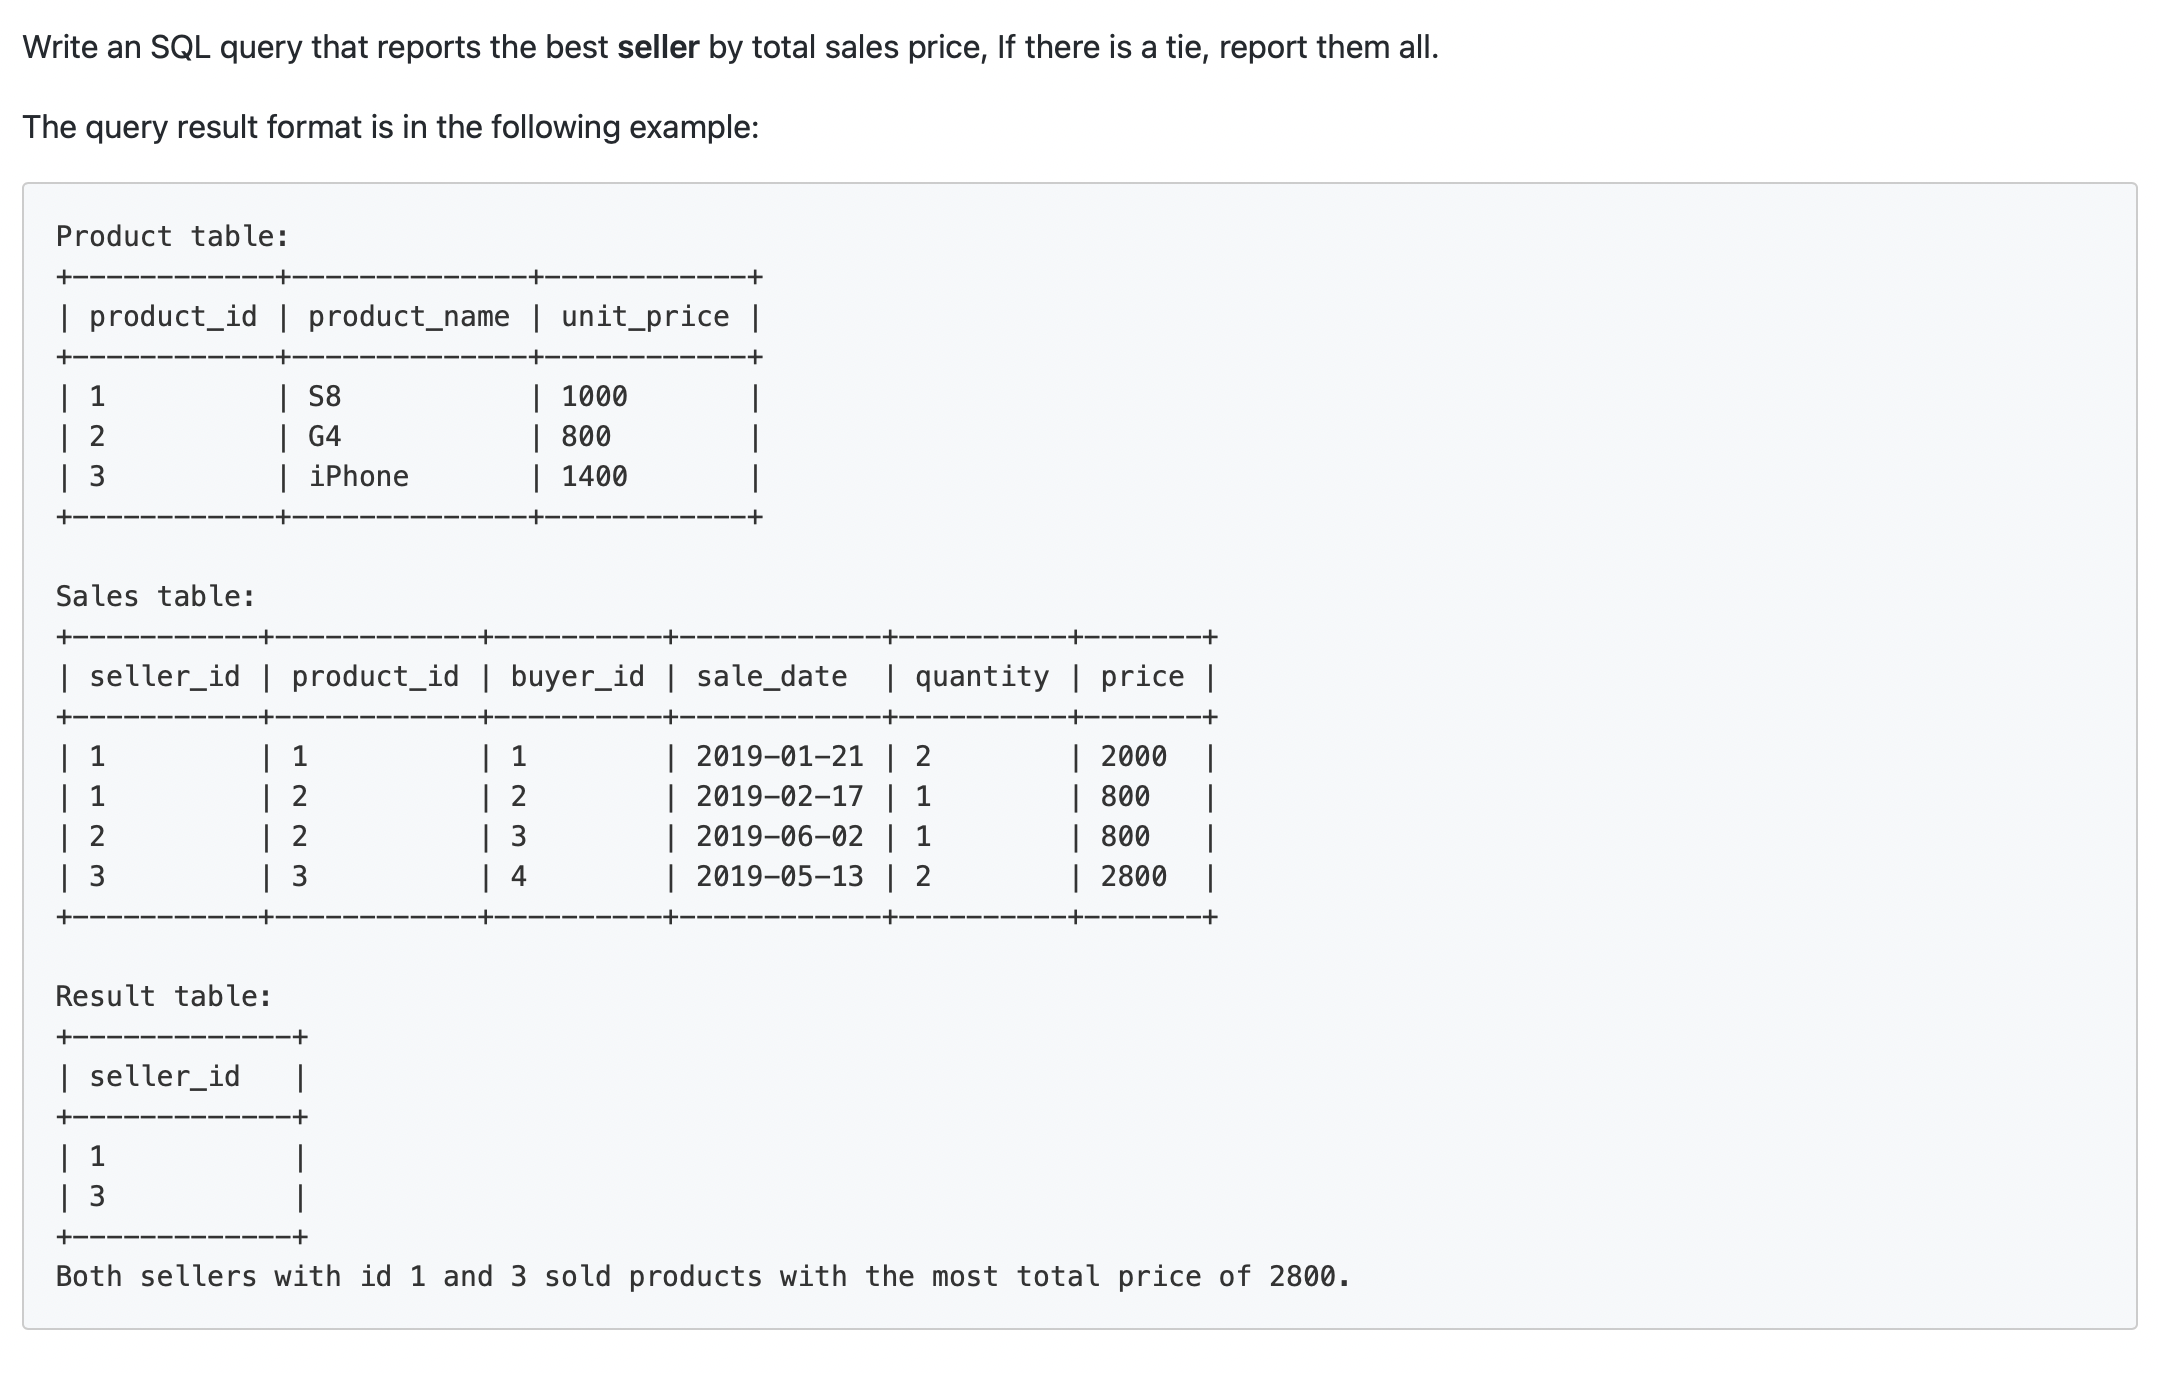

In [38]:
query = '''SELECT seller_id FROM Sales2 GROUP BY seller_id HAVING sum(price) = 
(SELECT sum(price) as sum FROM Sales2 GROUP BY seller_id order by sum DESC LIMIT 1)
'''
cursor.execute(query)
for row in cursor:
    print(row) 

(1,)
(3,)


# 1083. Sales Analysis II
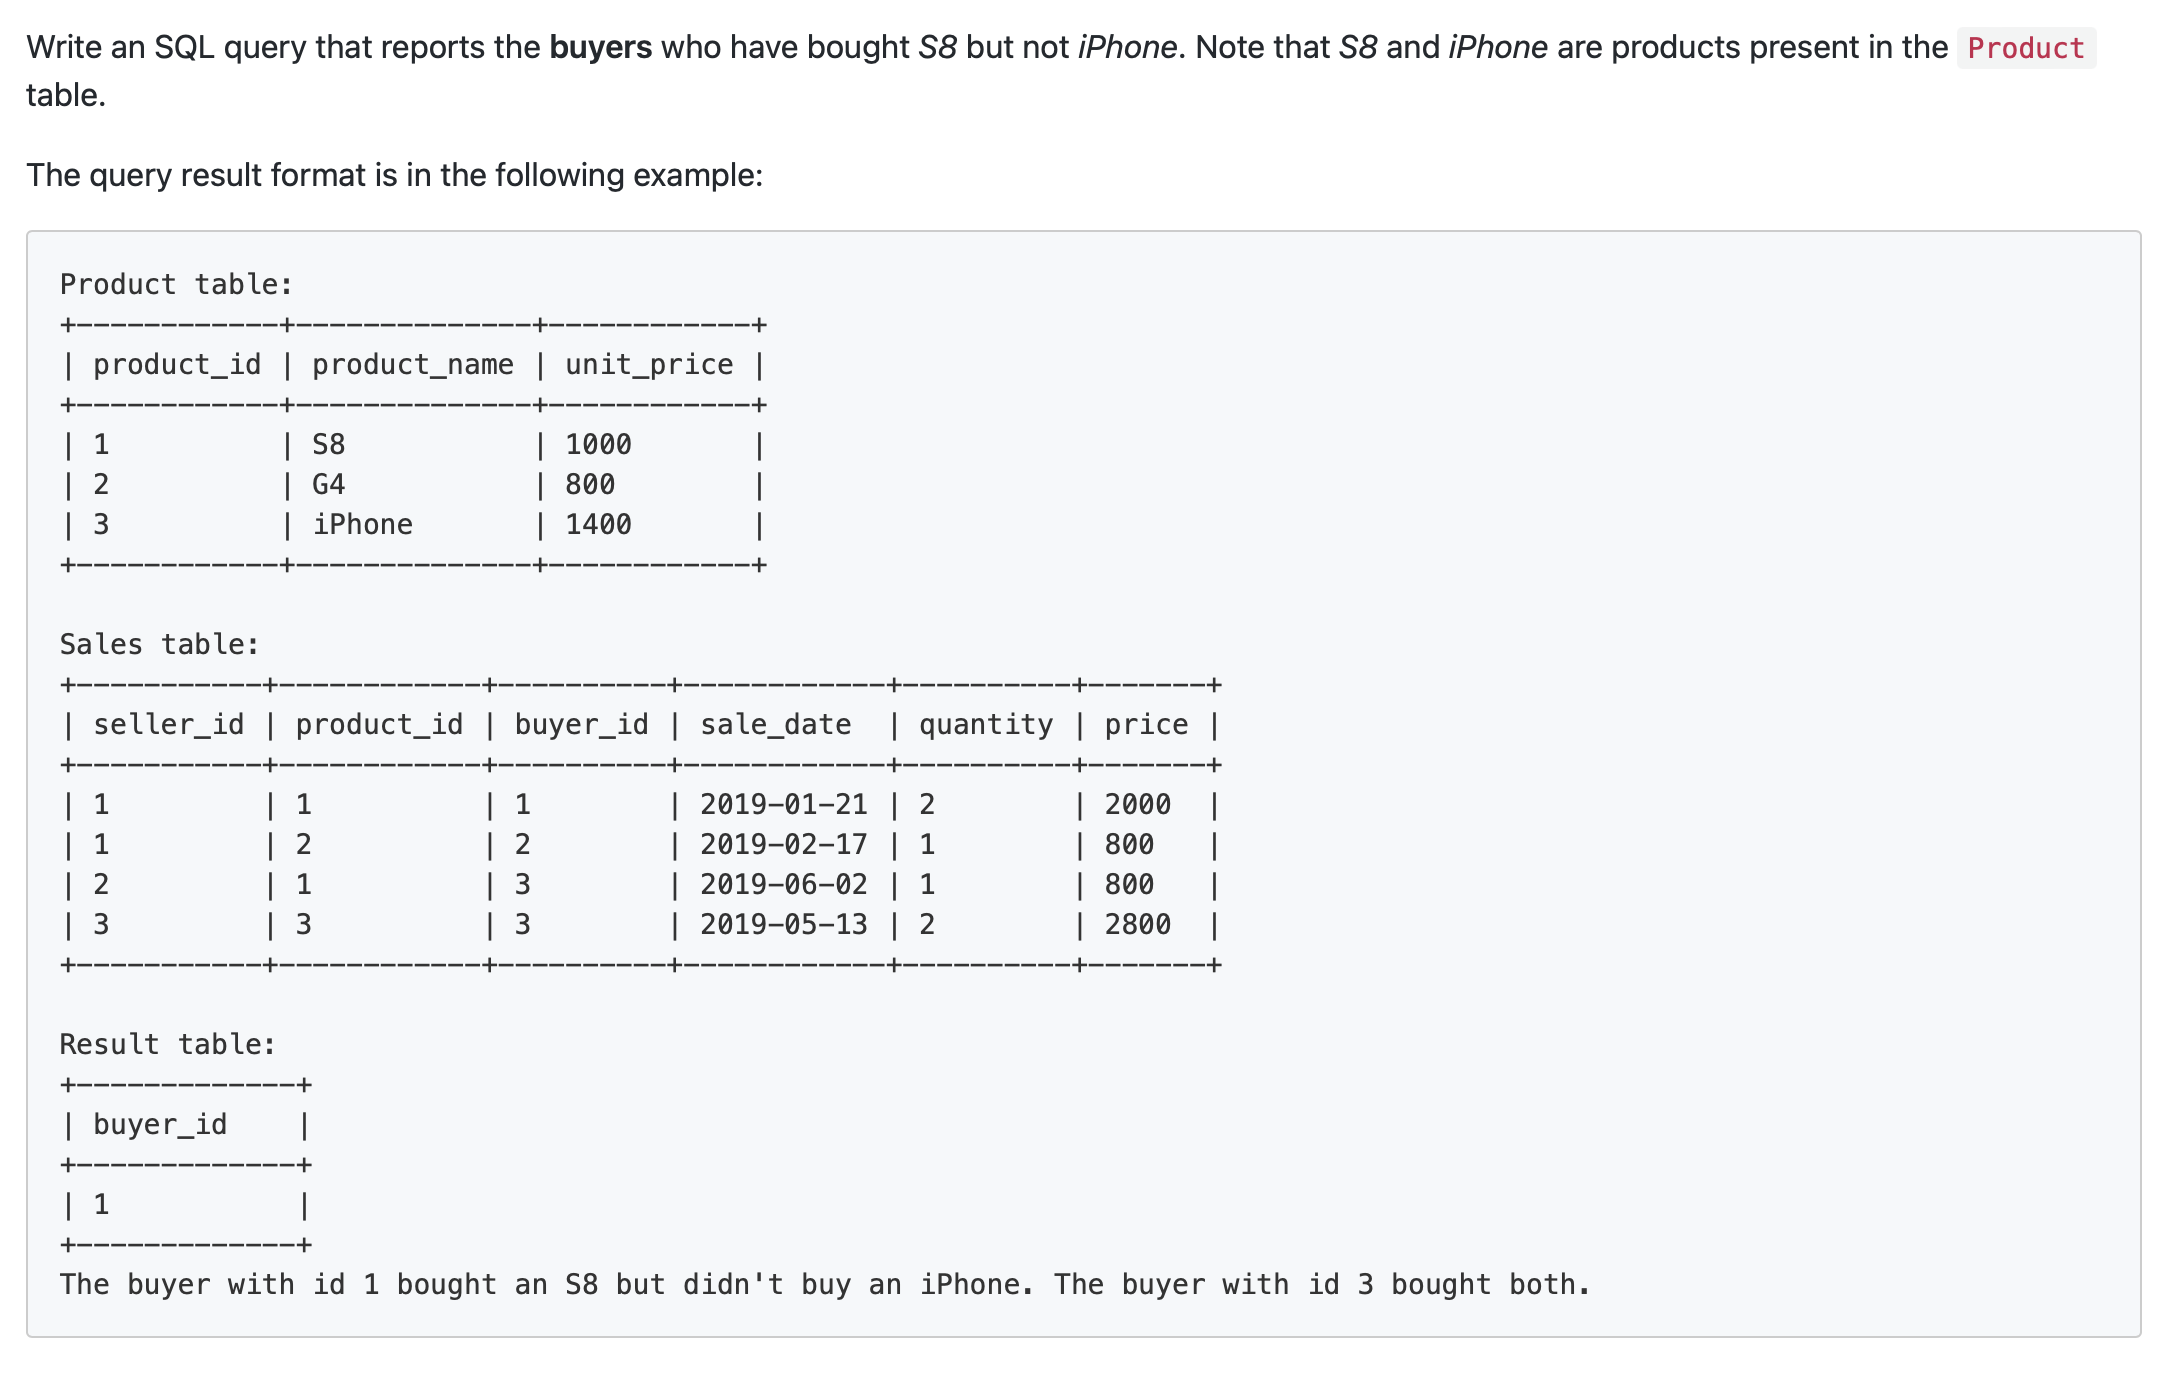

In [68]:
query = '''SELECT buyer_id FROM Sales3 s JOIN Product p 
ON s.product_id = p.product_id GROUP BY buyer_id HAVING 
sum(IIF(product_name='S8',1,0))>0 AND sum(IIF(product_name='iphone',1,0))=0
'''
cursor.execute(query)
for row in cursor:
    print(row) 

(1,)


In [39]:
query = '''
SELECT buyer_id FROM Sales3 s JOIN Product p ON s.product_id = p.product_id 
WHERE product_name = 'S8' and buyer_id not in 
(SELECT buyer_id FROM Sales3 s JOIN Product p ON s.product_id = p.product_id 
WHERE product_name = 'iphone')
'''
cursor.execute(query)
for row in cursor:
    print(row) 

(1,)


# 1084. Sales Analysis III
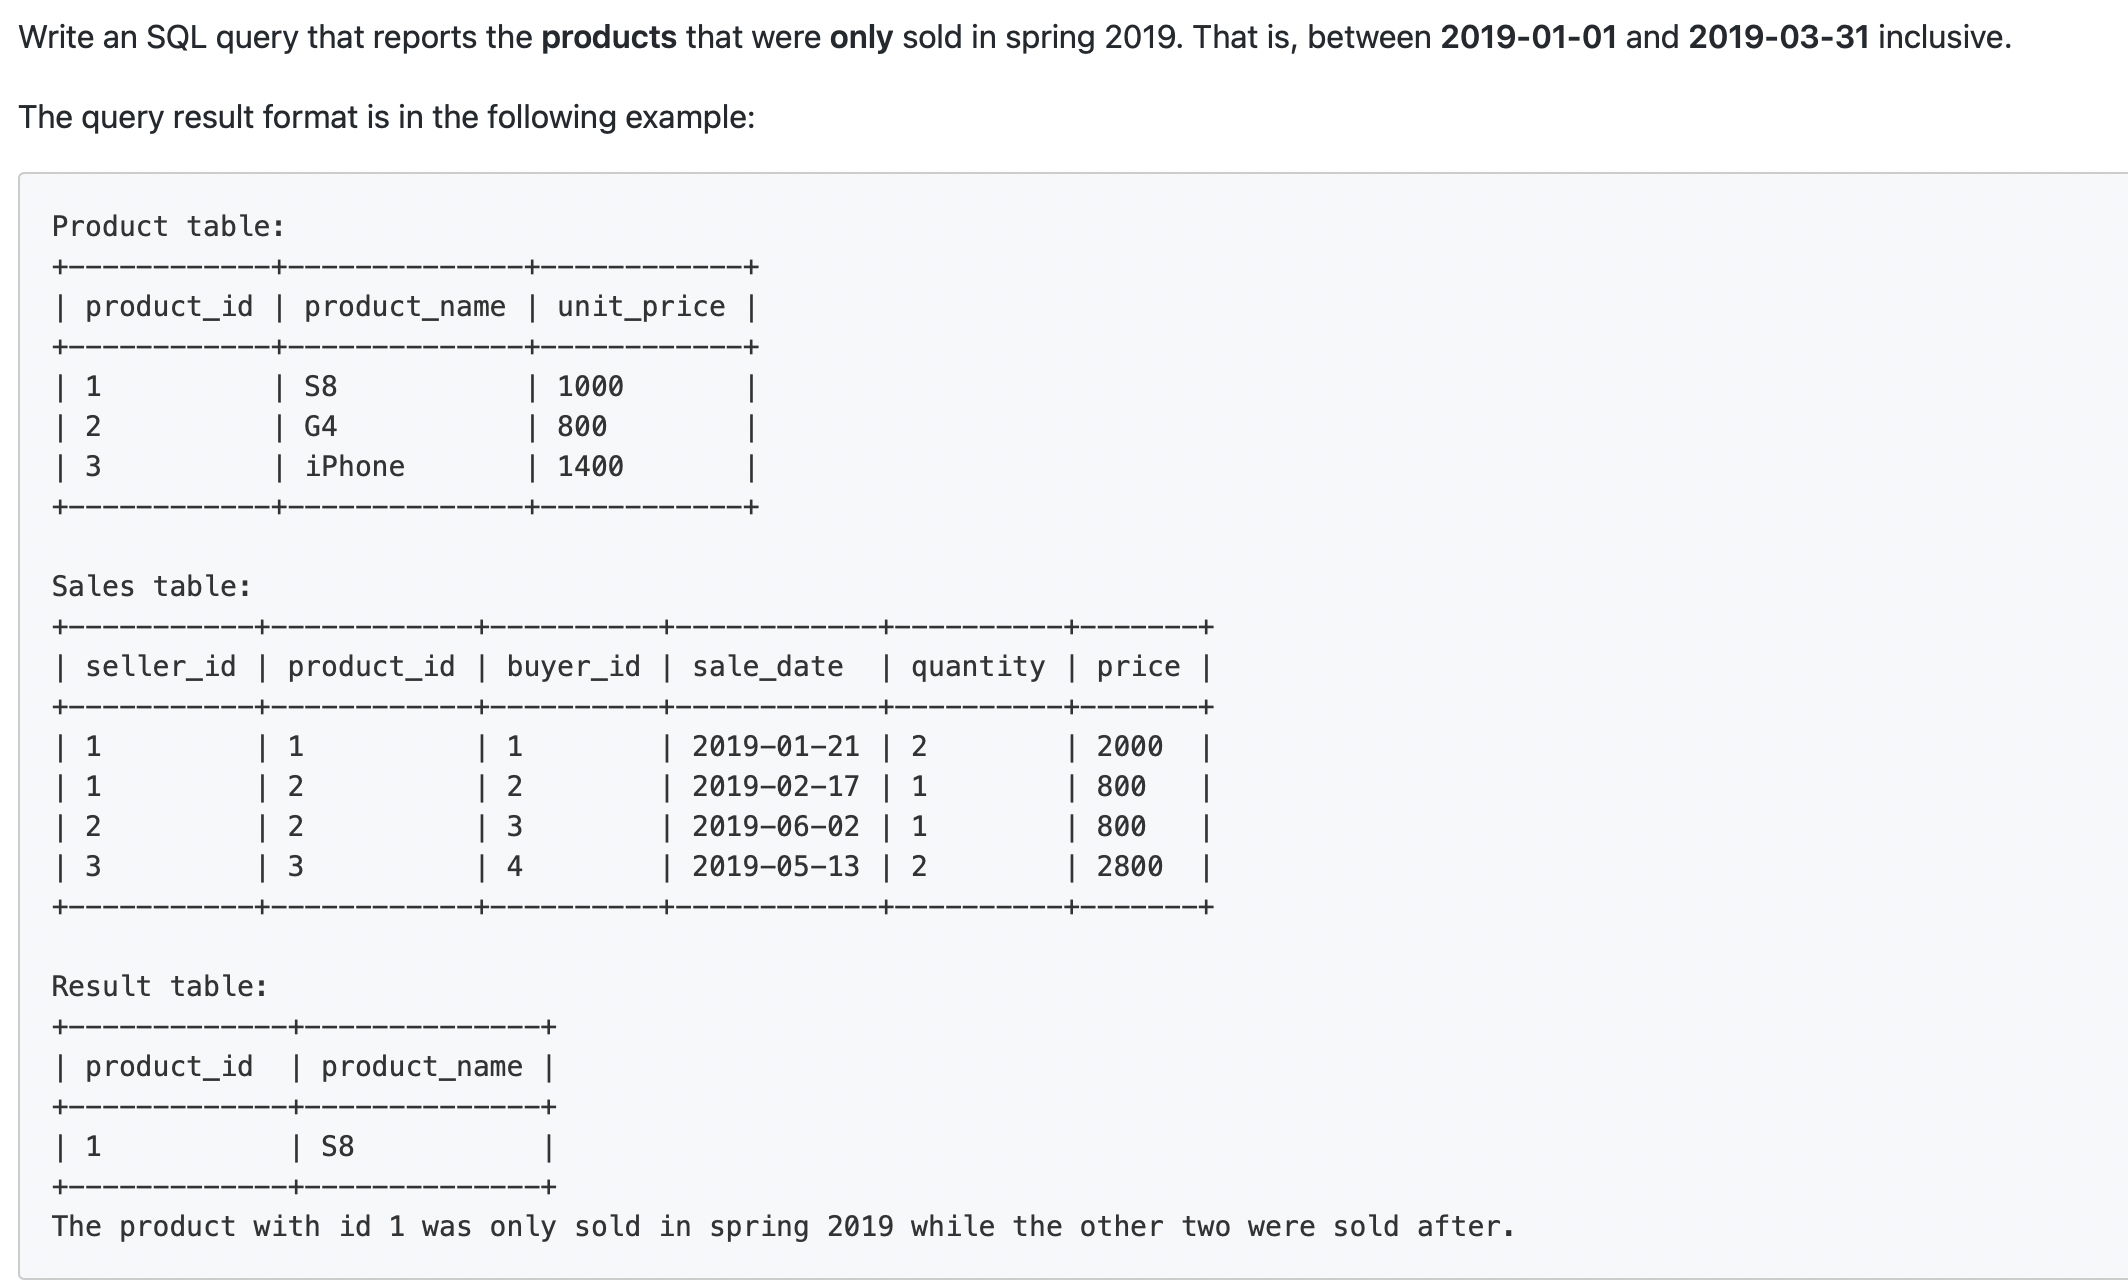

In [72]:

query = '''SELECT s.product_id, product_name FROM Sales2 s JOIN Product p ON s.product_id = p.product_id
GROUP BY s.product_id HAVING min(sale_date) >= '2019-01-01' AND max(sale_date) <= '2019-03-31' '''

cursor.execute(query)
for row in cursor:
    print(row) 

(1, 'S8')
